In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the dataset
data = pd.read_csv('../data/data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Display summary statistics to get an overview of numerical features
print(data.describe())

# Check for missing values in each column
print('Missing Values:', data.isnull().sum())


data = data.dropna()
print(data)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM   
count  511.000000  511.000000  511.000000  511.000000  511.000000  506.000000  \
mean     3.584139   11.252446   11.151096    0.068493    0.554757    6.287589   
std      8.564433   23.234838    6.828175    0.252838    0.115310    0.703802   
min      0.006320    0.000000    0.460000    

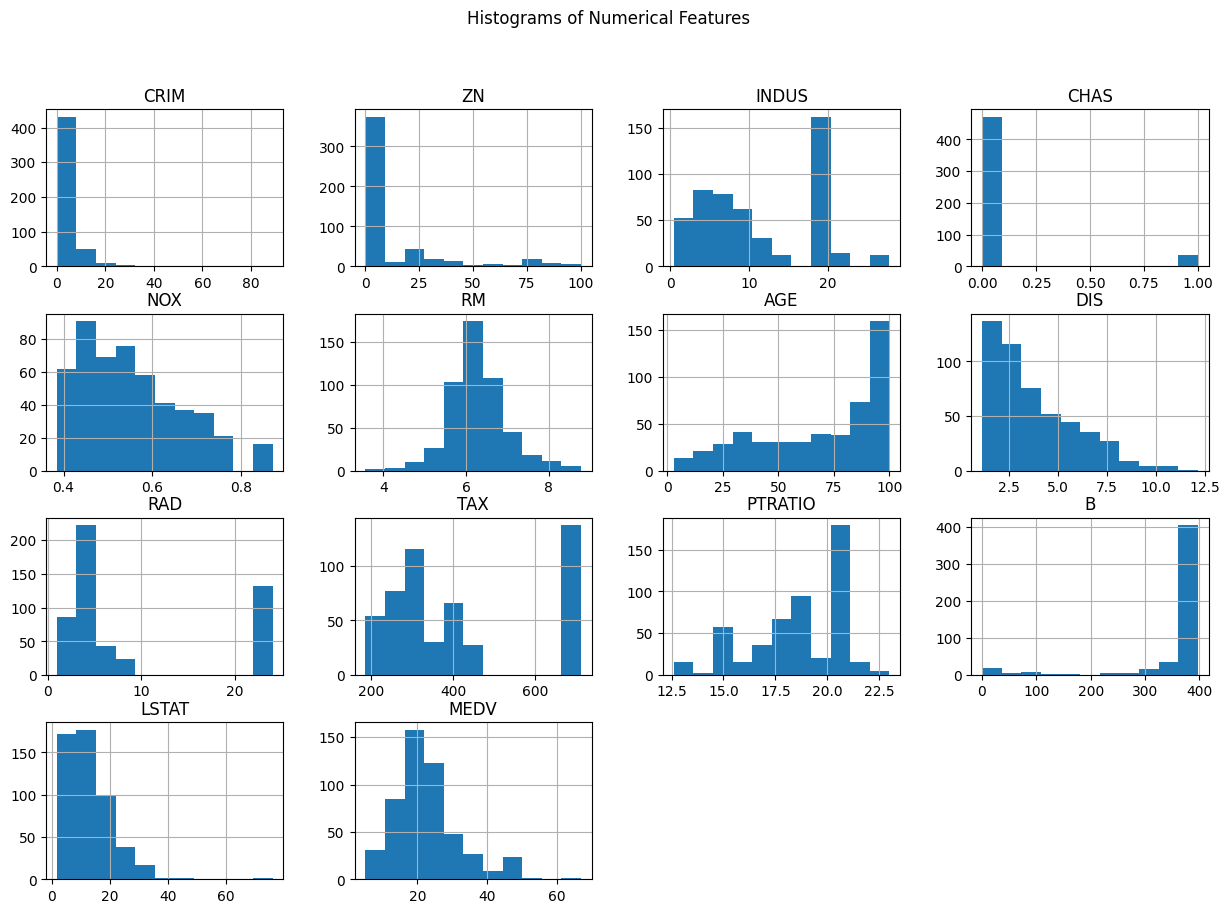

In [2]:
# Histograms for numerical data to understand distributions
data.hist(bins=11, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

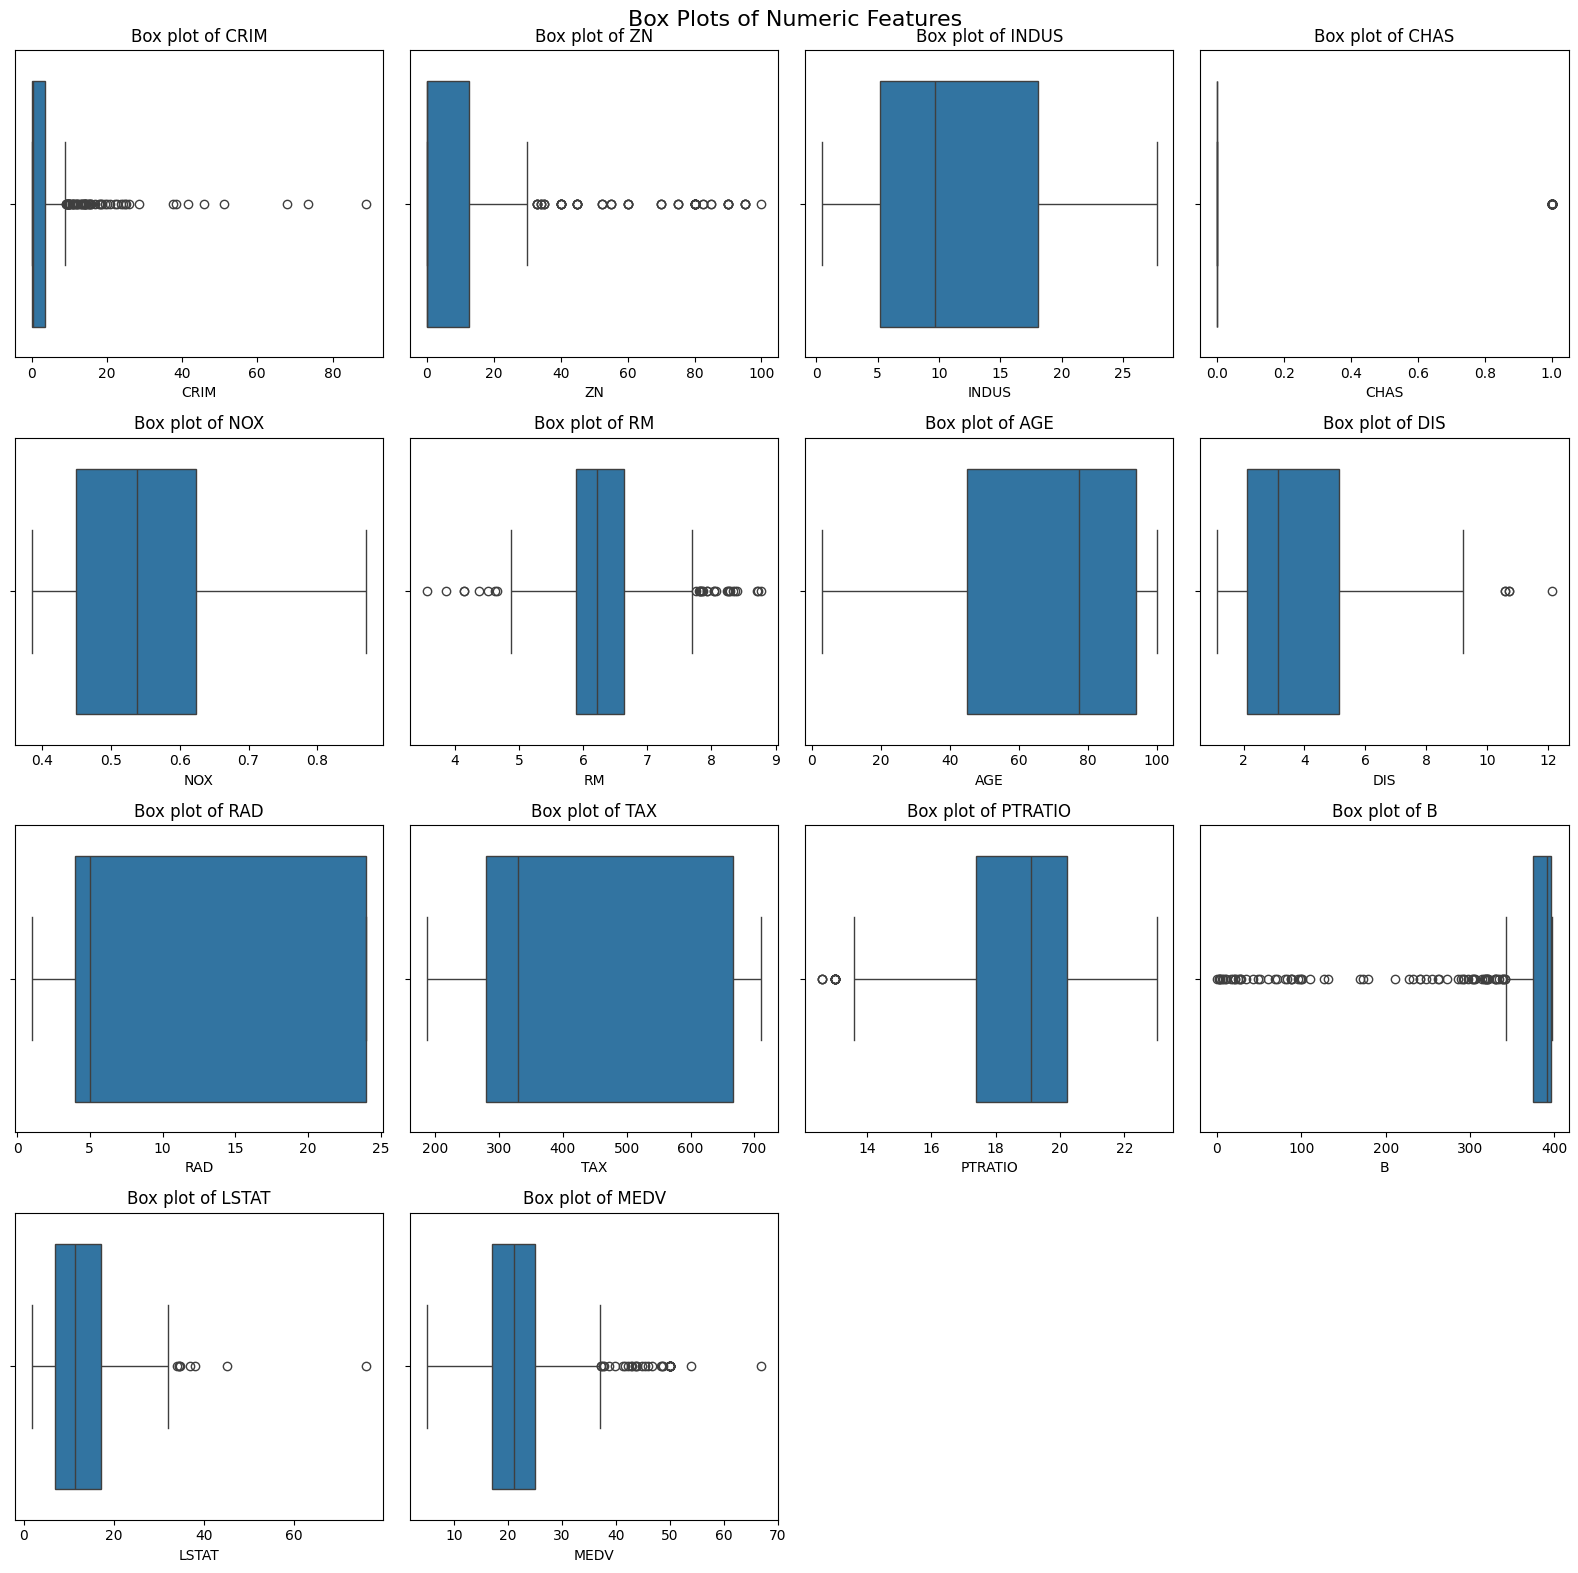

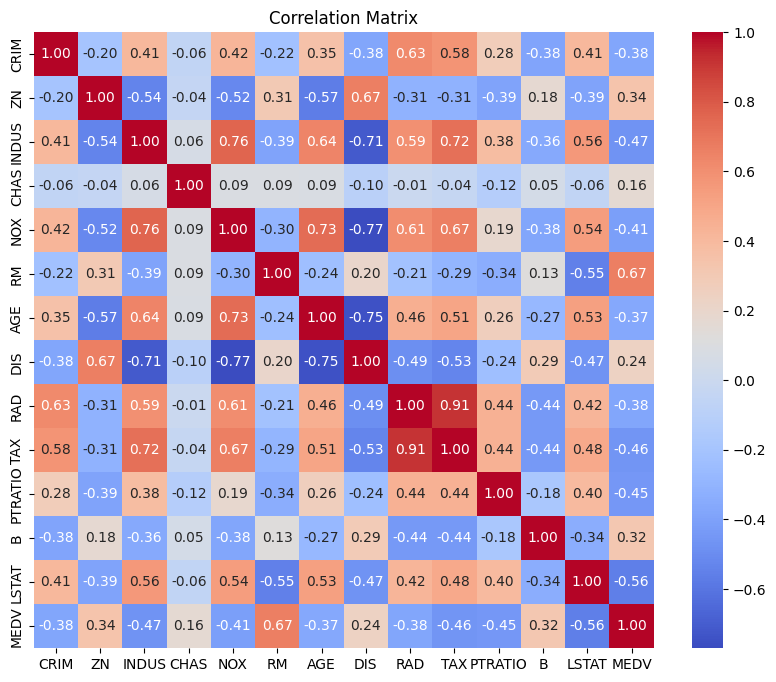

In [3]:

# Get the list of numeric columns
numeric_columns = data.select_dtypes(include='number').columns

# Calculate the number of rows and columns for subplots
num_plots = len(numeric_columns)
num_rows = (num_plots + 3) // 4  # Divide by 4 and round up

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(16, 4 * num_rows))
fig.suptitle("Box Plots of Numeric Features", fontsize=16)

# Iterate through each column and create a box plot
for i, column in enumerate(numeric_columns):
    row, col = divmod(i, 4)
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box plot of {column}')

# Hide any empty subplots
for i in range(num_plots, num_rows * 4):
    row, col = divmod(i, 4)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

# Correlation matrix heatmap to understand the relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [4]:
# Check for missing values in each column
print('Missing Values: \n', data.isnull().sum())

# Print the number of rows in the dataset
print('Number of Rows: ', len(data))

# The percentage of missing values with respect to the entire dataset
print(f'Percentage of Missing Values: {data.isnull().sum().sum()/len(data)*100}%')

#Because there is only a minimal number of null values (< 1%), we can remove them completely
data = data.dropna()

print('Number of Rows (Updated): ', len(data))

print('Missing Values: \n', data.isnull().sum())


Missing Values: 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Number of Rows:  506
Percentage of Missing Values: 0.0%
Number of Rows (Updated):  506
Missing Values: 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


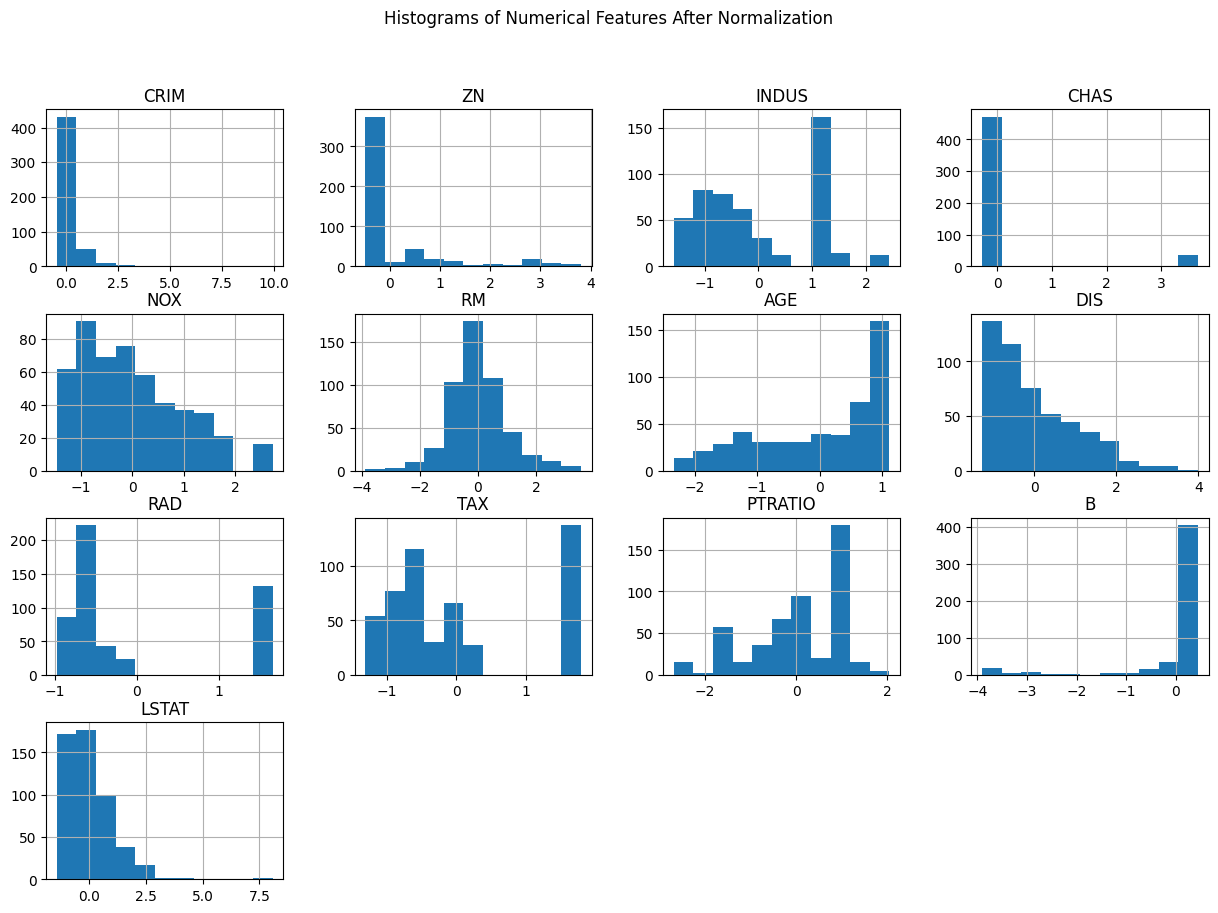


mean after standardization: 
 CRIM      -5.616939e-17
ZN        -2.808469e-17
INDUS     -2.808469e-17
CHAS      -3.510587e-17
NOX        2.527622e-16
RM        -5.265880e-17
AGE        8.425408e-17
DIS        0.000000e+00
RAD        0.000000e+00
TAX        5.616939e-17
PTRATIO   -1.319981e-15
B          1.123388e-16
LSTAT      0.000000e+00
dtype: float64, 
std after standardization:
 CRIM       1.00099
ZN         1.00099
INDUS      1.00099
CHAS       1.00099
NOX        1.00099
RM         1.00099
AGE        1.00099
DIS        1.00099
RAD        1.00099
TAX        1.00099
PTRATIO    1.00099
B          1.00099
LSTAT      1.00099
dtype: float64


In [5]:
from sklearn.preprocessing import StandardScaler

# A lot of the features have many outliers, as evidenced by the boxplots
# Therefore, it is essential to standardize the data to improve the model

#Initializing standard scalar, which will be used to standardize the features of the data
scalar = StandardScaler()

# Initialzing a dataframe excluding the target variable (Median Value)
data_features = data.drop(columns=['MEDV'])

# Storing the names for all the features
features = data_features.columns.tolist()

#Transform all the features in the data using the Z-score method
data_normalized = pd.DataFrame(data, columns=features)
data_normalized = pd.DataFrame(scalar.fit_transform(data[features]))
data_normalized.columns = features


#Visualizng results using histograms
mean = np.mean(data_normalized)
data_normalized.hist(bins=11, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features After Normalization')
plt.show()

#To verify that mean is 0 and standard deviation is 1
print("\nmean after standardization: \n {}, \nstd after standardization:\n {}".format(data_normalized[features].mean() , data_normalized[features].std()))


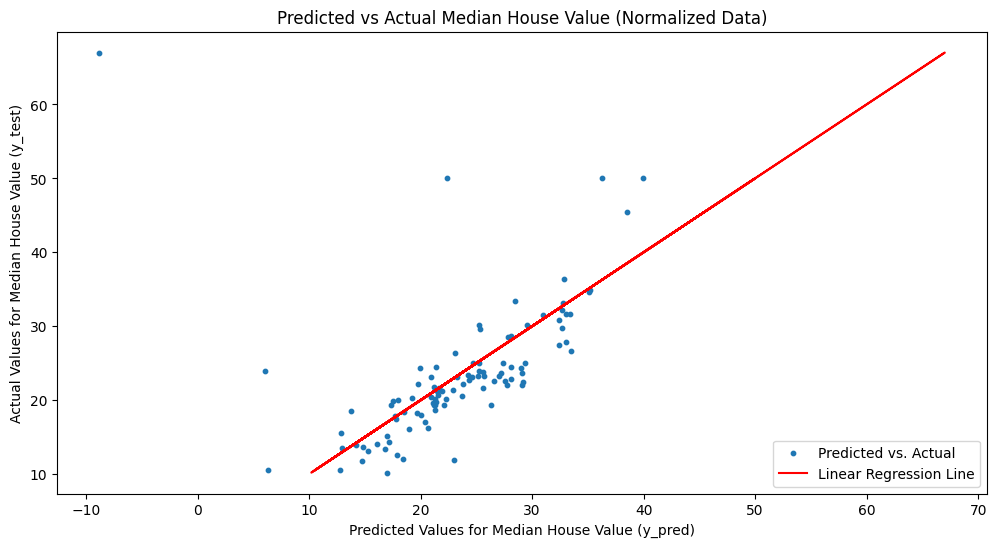

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

#Initalizing input and target data using the standardized dataset
X = data_normalized
y = data['MEDV']

# Splitting dataset and running linear regression after normalizing features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting values with normalized testing set
y_pred = model.predict(X_test)

#visualizing results with a plot with normalized data
plt.figure(figsize=(12, 6))
plt.scatter(x = y_pred, y = y_test, s = 10, label='Predicted vs. Actual')
plt.plot(y_test, y_test, color ='red', label = 'Linear Regression Line')
plt.ylabel('Actual Values for Median House Value (y_test)')
plt.xlabel('Predicted Values for Median House Value (y_pred)')
plt.title('Predicted vs Actual Median House Value (Normalized Data)')
plt.legend()
plt.show()



Test for and remove outliers using one class SVM

To test whether the issue of multicollinearity must be dealt with, the variance inflation factor of each variable was calculated.

In [7]:
# This code block was not used as it involved removing outlier prior to VIF which caused underfitting of the model due to the removal of too many features

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Correlation matrix heatmap to understand the relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

X2 = data_cleaned.drop(columns=['MEDV'])
features = X2.columns.tolist()
X2 = pd.DataFrame(X2, columns=features)

vif_data2 = pd.DataFrame()
vif_data2["Feature"] = X2.columns
vif_data2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# Display the VIF values
print(vif_data2)

X2_1 = X2.drop(columns=['PTRATIO'])

vif_data = pd.DataFrame()
vif_data["Feature"] = X2_1.columns
vif_data["VIF"] = [variance_inflation_factor(X2_1.values, i) for i in range(X2_1.shape[1])]

print()
print(vif_data)

X2_2 = X2_1.drop(columns=['NOX'])

vif_data = pd.DataFrame()
vif_data["Feature"] = X2_2.columns
vif_data["VIF"] = [variance_inflation_factor(X2_2.values, i) for i in range(X2_2.shape[1])]

print()
print(vif_data)

X2_3 = X2_2.drop(columns=['TAX'])

vif_data = pd.DataFrame()
vif_data["Feature"] = X2_3.columns
vif_data["VIF"] = [variance_inflation_factor(X2_3.values, i) for i in range(X2_3.shape[1])]

print()
print(vif_data)

X2_4 = X2_3.drop(columns=['RM'])

vif_data = pd.DataFrame()
vif_data["Feature"] = X2_4.columns
vif_data["VIF"] = [variance_inflation_factor(X2_4.values, i) for i in range(X2_4.shape[1])]

print()
print(vif_data)

X2_5 = X2_4.drop(columns=['B'])

vif_data = pd.DataFrame()
vif_data["Feature"] = X2_5.columns
vif_data["VIF"] = [variance_inflation_factor(X2_5.values, i) for i in range(X2_5.shape[1])]

print()
print(vif_data)

X2_6 = X2_5.drop(columns=['AGE'])

vif_data = pd.DataFrame()
vif_data["Feature"] = X2_6.columns
vif_data["VIF"] = [variance_inflation_factor(X2_6.values, i) for i in range(X2_6.shape[1])]

print()
print(vif_data)

NameError: name 'data_cleaned' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = data_normalized.columns
vif_data["VIF"] = [variance_inflation_factor(data_normalized.values, i) for i in range(data_normalized.shape[1])]

# Display the VIF values
print(vif_data)

X_mod = data_normalized.drop(columns=['TAX'])

vif_data = pd.DataFrame()
vif_data["Feature"] = X_mod.columns
vif_data["VIF"] = [variance_inflation_factor(X_mod.values, i) for i in range(X_mod.shape[1])]

print()
print(vif_data)


In [ ]:
from sklearn.svm import OneClassSVM

# Convert Data Frame to a 2D array
data_normalized.drop(columns=['TAX'])
input_data = data_normalized.to_numpy()

# Train one-class SVM
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
svm.fit(input_data)

# Predict anomalies
pred = svm.predict(input_data)

# Extract the negative outputs as outliers
anom_index = np.where(pred == -1)
outlier_values = input_data[anom_index]

# Extract the 1-dimensional indices from the anom_index array
outlier_indices = anom_index[0]

# Remove rows corresponding to outliers
data_cleaned = data.drop(columns=['TAX']).drop(index=outlier_indices)

# Optionally, reset the index
data_cleaned.reset_index(drop=True, inplace=True)

print(data_cleaned)


In [ ]:
data_cleaned.to_csv('data_cleaned.csv', index=False)